In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix

# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import display, Markdown, Latex

## seaborn
import seaborn as sns
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})
sns.set_style("whitegrid")

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

## plotly
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

import warnings
warnings.filterwarnings("ignore")

# Moving Beyond Linearity

## Polynomial Regression

As an extension of the linear regression is polynomial regression. This can be done with replacing the standard linear model
$$y_i = \beta_0 + x_{i} + \beta_1 \epsilon_i, $$ 
with a polynomial function
$$y_i = \beta_0 + \sum_{j}^{d} \beta_j x^{j}_{i} + \epsilon_i.$$ 


Let's demonstrate this using an example and [**Seaborn regplot**](https://seaborn.pydata.org/generated/seaborn.regplot.html).

<div class="alert alert-block alert-info">
<font size="+2"><b>Auto Dataset Example</b></font>
</div>


In this section, we work on the **ISLR Auto dataset** which includes the mpg (gas mileage in miles per gallon)
versus horsepower, ... for a number of cars. The dataset is available at [this link](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html).

In [2]:
Auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
Auto.columns = [x.title().replace('Mpg','MPG') for x in Auto.columns.tolist()]
Auto.head()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  Year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   Origin                       Name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

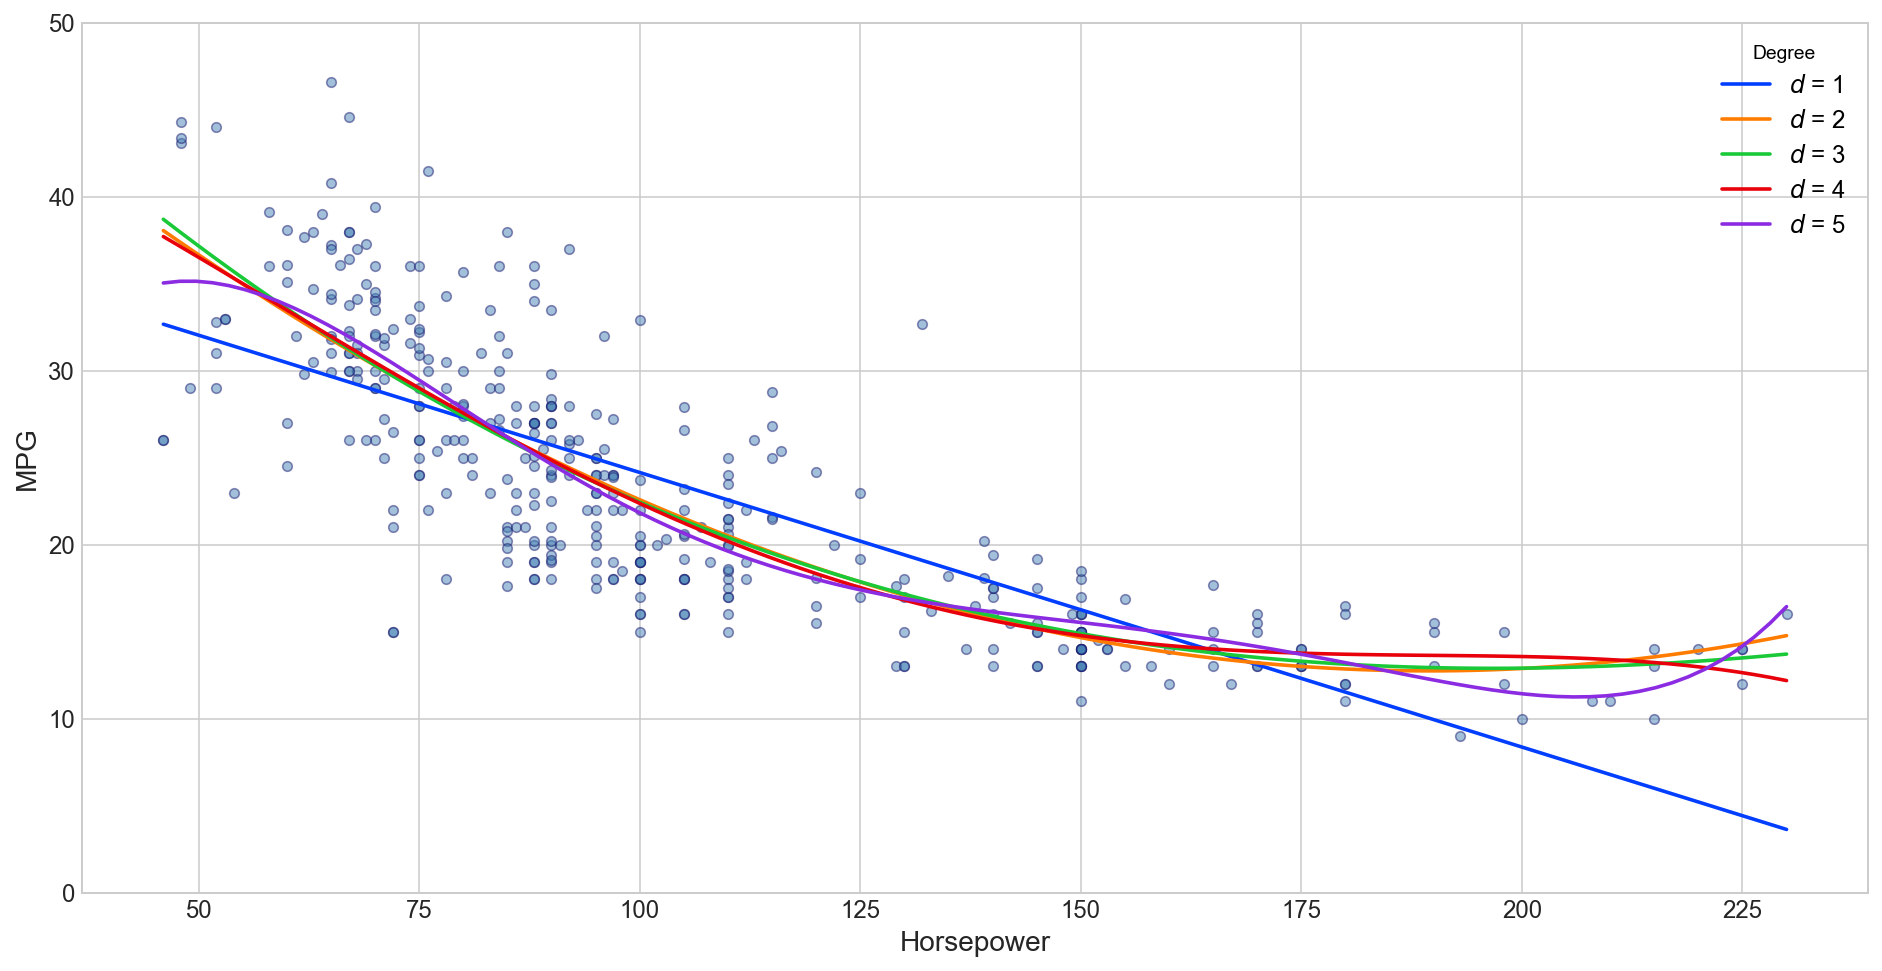

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
_ = ax.scatter(Auto['Horsepower'], Auto['MPG'], facecolors='SteelBlue', edgecolors='MidnightBlue', alpha=.5) 
Degrees = np.arange(1,6)
Colors = sns.color_palette("bright", len(Degrees))
for i in range(len(Degrees)):
    _ = sns.regplot(Auto['Horsepower'], Auto['MPG'], ci=None, label=r'$d$ = %i' % Degrees[i], order=Degrees[i],
                    scatter=False, color= Colors[i])
_ = ax.legend(title = 'Degree', bbox_to_anchor=(1, 1), fontsize = 12)
_ = ax.set_ylim([0, 50])

Note that here we used the following model:

$$\mbox{MPG} = \beta_0 + \sum_{j}^{d} \beta_j ~\times~ \mbox{Horsepower}^{j}, \quad d = 1, 2, \ldots, 5$$ 

Note that it is unusual to use a large number for $d$ as the polynomial curve can become overly flexible and can take on some very strange shapes for large values of $d$.

<div class="alert alert-block alert-info">
<font size="+2"><b>Wage Example</b></font>
</div> 

This dataset can be extracted from the [**ISLR package**](https://cran.r-project.org/web/packages/ISLR/index.html) using the following syntax.
```R
library (ISLR)
write.csv(Wage, "Wage.csv")
```

In [4]:
Wage = pd.read_csv('Data/Wage.csv', index_col=0).reset_index(drop = True)
Wage.columns = [x.title() for x in Wage.columns.tolist()]
Wage.head()

Year  Age            Maritl      Race        Education              Region  \
0  2006   18  1. Never Married  1. White     1. < HS Grad  2. Middle Atlantic   
1  2004   24  1. Never Married  1. White  4. College Grad  2. Middle Atlantic   
2  2003   45        2. Married  1. White  3. Some College  2. Middle Atlantic   
3  2003   43        2. Married  3. Asian  4. College Grad  2. Middle Atlantic   
4  2005   50       4. Divorced  1. White       2. HS Grad  2. Middle Atlantic   

         Jobclass          Health Health_Ins   Logwage        Wage  
0   1. Industrial       1. <=Good      2. No  4.318063   75.043154  
1  2. Information  2. >=Very Good      2. No  4.255273   70.476020  
2   1. Industrial       1. <=Good     1. Yes  4.875061  130.982177  
3  2. Information  2. >=Very Good     1. Yes  5.041393  154.685293  
4  2. Information       1. <=Good     1. Yes  4.318063   75.043154

We can create two distinct populations:
* **High Earners** group: earn more than $\$250,000$ per annum,
* **Lows Earners** group: earn less than $\$250,000$ per annum,

Then using Logistic regression, we can predict this binary response, using polynomial functions of age
as predictors. In other words, we fit the model
$$Pr(y_i > 250|x_i)~=~
\frac{\exp(\beta_0 + \beta_1x_i + \beta_2x_i + \ldots + \beta_dx_i )}{1+\exp(\beta_0 + \beta_1x_i + \beta_2x_i + \ldots + \beta_dx_i )}.$$

First, let's find the most suitable degree for the polynomial of **Age**.

The most suitable degree = 4


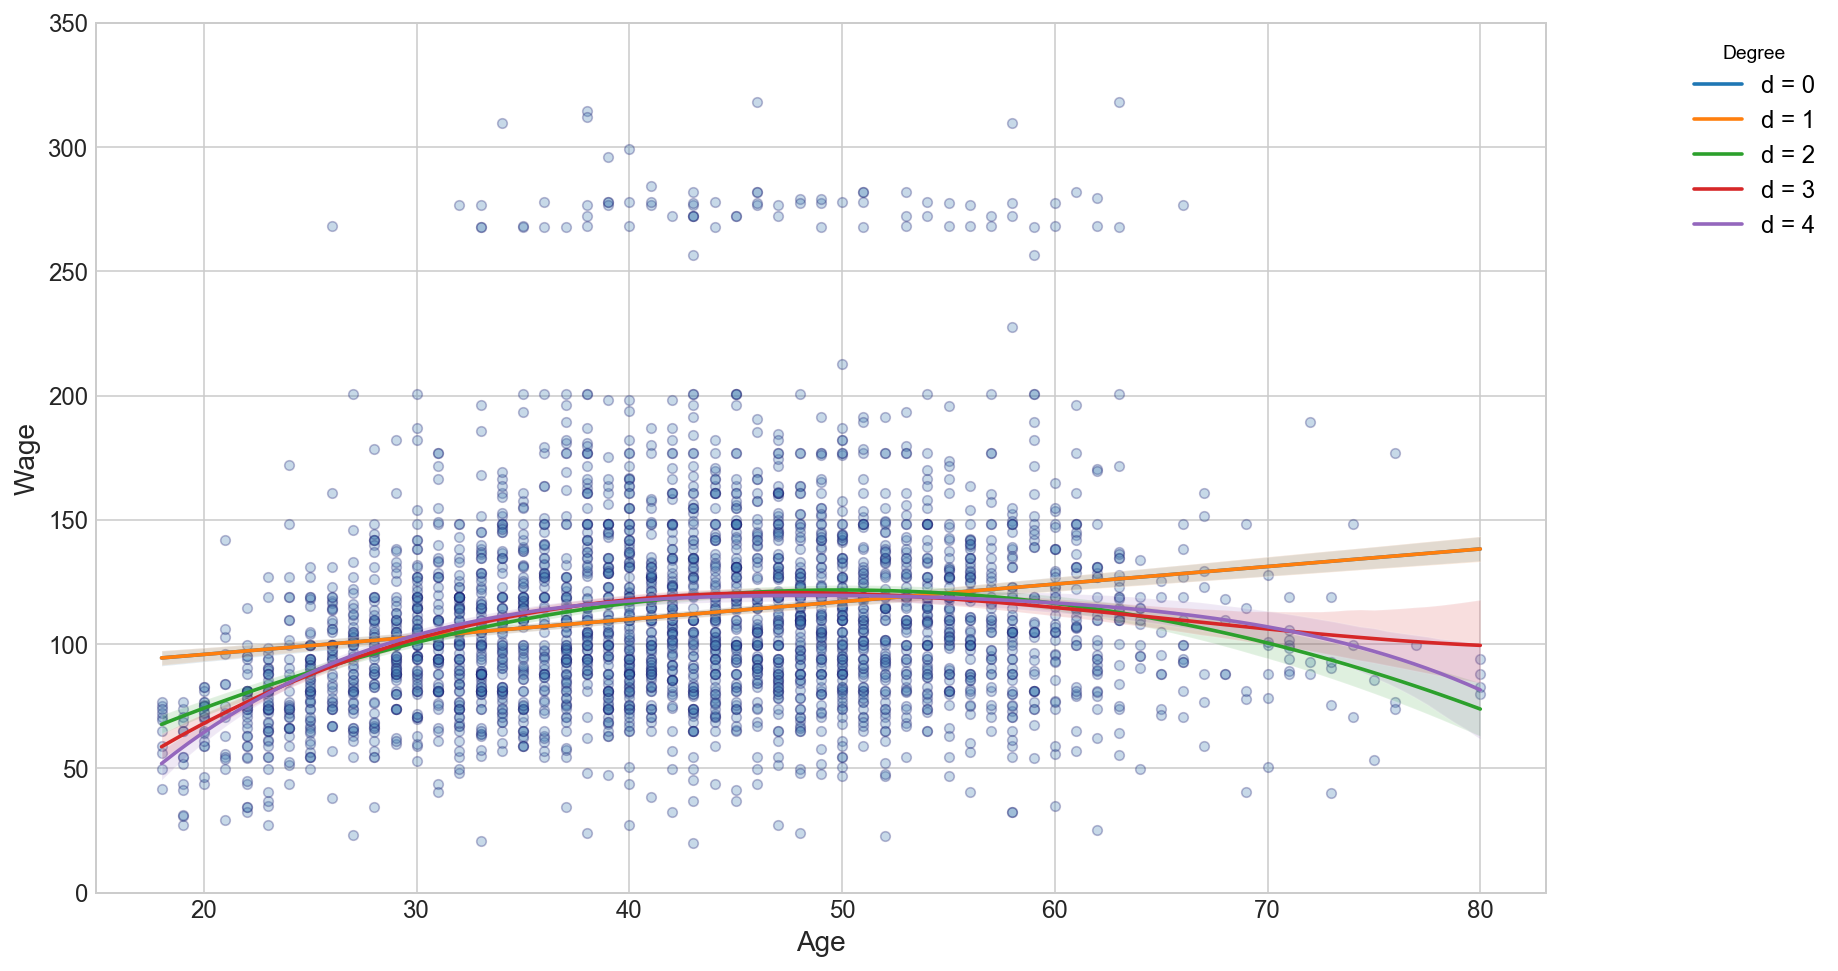

In [5]:
fit_1 =  sm.GLS(Wage.Wage, PolynomialFeatures(1).fit_transform(Wage.Age.values.reshape(-1,1))).fit()
fit_2 =  sm.GLS(Wage.Wage, PolynomialFeatures(2).fit_transform(Wage.Age.values.reshape(-1,1))).fit()
fit_3 =  sm.GLS(Wage.Wage, PolynomialFeatures(3).fit_transform(Wage.Age.values.reshape(-1,1))).fit()
fit_4 =  sm.GLS(Wage.Wage, PolynomialFeatures(4).fit_transform(Wage.Age.values.reshape(-1,1))).fit()
fit_5 =  sm.GLS(Wage.Wage, PolynomialFeatures(5).fit_transform(Wage.Age.values.reshape(-1,1))).fit()

Results = sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1)
display(Results.style.background_gradient(cmap='summer',subset=['df_resid']))


fig, ax = plt.subplots(1,1, figsize=(13,8))
_ = ax.scatter(Wage['Age'], Wage['Wage'], facecolors='SteelBlue', edgecolors='MidnightBlue', alpha=.3)
for i in range(5):
    _ = sns.regplot(Wage['Age'], Wage['Wage'], order = i, label = 'd = %i' % i, truncate=True, scatter=False, ax=ax)

_ = ax.set_ylim([0, 350])
_ = ax.legend(title = 'Degree', bbox_to_anchor=(1.2, 1), fontsize = 12)

print(Back.CYAN + Fore.BLACK + Style.BRIGHT + 'The most suitable degree' + Style.RESET_ALL + ' = %i' % 
      Results[Results.df_resid ==Results.df_resid.min()].index[0])

Now,  we fit the model
$$Pr(y_i > 250|x_i)~=~
\frac{\exp(\beta_0 + \beta_1x_i + \beta_2x_i + \ldots + \beta_4x_i )}{1+\exp(\beta_0 + \beta_1x_i + \beta_2x_i + \ldots + \beta_4x_i )}.$$

Fitting,

In [6]:
y = Wage['Wage'].map(lambda x: 1 if x> 250 else 0).astype(int)
reg = sm.GLM(y, PolynomialFeatures(4).fit_transform(Wage.Age.values.reshape(-1,1)),
                 family=sm.families.Binomial(sm.families.links.logit)).fit()
display(reg.summary().tables[1])

Age = np.arange(Wage['Age'].min(), Wage['Age'].max()).reshape(-1,1)
# transforming Age feature
Temp = PolynomialFeatures(4).fit_transform(Age)
Pred = reg.predict(Temp)
del Temp

<class 'statsmodels.iolib.table.SimpleTable'>

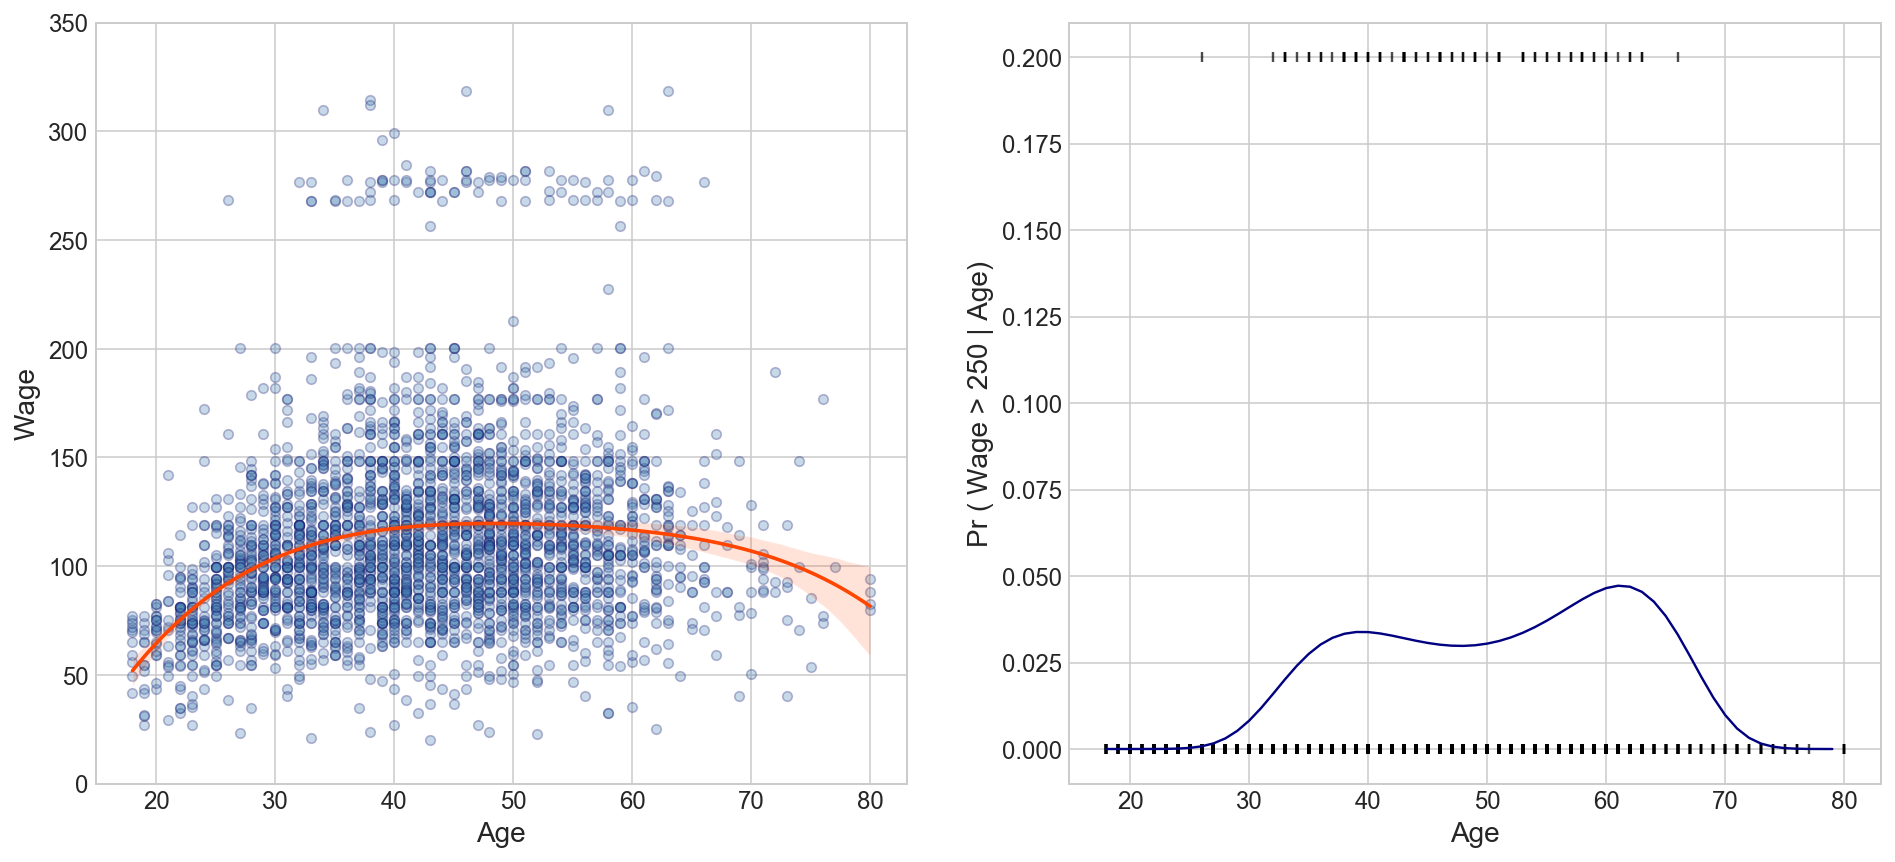

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))

# Left
_ = ax[0].scatter(Wage['Age'], Wage['Wage'], facecolors='SteelBlue', edgecolors='MidnightBlue', alpha=.3)
_ = sns.regplot(Wage['Age'], Wage['Wage'], color='OrangeRed', order = 4, truncate=True, scatter=False, ax=ax[0])
_ = ax[0].set_ylim([0, 350])

# Right
_ = ax[1].plot(Age, Pred, color='Navy')
_ = ax[1].scatter(Wage['Age'], y/5, s=30, c='Black', marker='|', alpha=0.7)
_ = ax[1].set_ylim(-0.01,0.21)
_ = ax[1].set_xlabel('Age')
_ = ax[1].set_ylabel('Pr ( Wage > 250 | Age)');

* **Left**: The solid red curve is a degree-4 polynomial of **Wage** (in thousands of dollars) as a function of age, fit by least squares. The dotted curves indicate an estimated 95 % confidence interval.

* **Right**: We model the binary event **Wage > 250** using logistic regression, again with a degree-4 polynomial. The fitted posterior probability of wage exceeding $250,000 is shown in blue.

## Step Functions

To avoid imposing such a global structure, step functions can be used. Let $c_1$, $c_2$, $\ldots$, $c_k$ in the range of $X$,
and then construct $K + 1$ new variables.

$$
\begin{cases}
C_0(X)&= I(X < c_1),\\
C_1(X)&= I(c_1 \leq X < c_2),\\
C_2(X)&=I(c_2 \leq X < c_3),\\
&\vdots\\
C_{K-1}(X)&=I(c_{K-1} ≤ X < c_{K}),\\
C_K(X)&=I(c_K \leq X),
\end{cases}
$$
where $I(·)$ is the [**step function**](https://en.wikipedia.org/wiki/Step_function), and

$$C_0(X) + C_1(X) + \ldots + C_K(X) = 1$$.

Then use least squares to fit a
linear model using $C_1(X)$, $C_2(X)$, $\ldots$ , C_K(X)$ as predictors 

$$y_i = \beta_0 + \sum_{j=1}^{K} \beta_j C_j(x_i)) + \epsilon_i.$$

Now, back to our wage example, we can fit the model
$$Pr(y_i > 250|x_i)~=~
\frac{\exp(\beta_0 + \sum_{j=1}^{4} \beta_j C_j(x_i))}{1+\exp(\beta_0 + \sum_{j=1}^{4} \beta_j C_j(x_i))}.$$

**Age** can be divided into four intervals using [**Pandas cut**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html). That is

In [8]:
cuts, bins = pd.cut(Wage['Age'], 4, retbins=True, right=True)
display(cuts.value_counts(sort=False).to_frame('Count'))

df = pd.concat([Wage['Age'], cuts.to_frame('Intervals'), Wage['Wage']], axis=1)
display(df.head())

Count
(17.938, 33.5]    750
(33.5, 49.0]     1399
(49.0, 64.5]      779
(64.5, 80.0]       72

Age       Intervals        Wage
0   18  (17.938, 33.5]   75.043154
1   24  (17.938, 33.5]   70.476020
2   45    (33.5, 49.0]  130.982177
3   43    (33.5, 49.0]  154.685293
4   50    (49.0, 64.5]   75.043154

Converting these intervales into dummy variables using [**Pandas get_dummies**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [9]:
df_dummies = pd.get_dummies(df['Intervals'])
display(df_dummies.head())

(17.938, 33.5]  (33.5, 49.0]  (49.0, 64.5]  (64.5, 80.0]
0               1             0             0             0
1               1             0             0             0
2               0             1             0             0
3               0             1             0             0
4               0             0             1             0

Now, we need to add the constant, $\beta_0$, and fit these data into the above model.

In [10]:
reg = sm.GLM(y, sm.add_constant(df_dummies), family=sm.families.Binomial(sm.families.links.logit)).fit()
reg.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

Now, we can use [**Numpy digitize**](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html?highlight=digitize#numpy.digitize) which returns the indices of the bins to which each value in input array belongs. Finally, we need convert these values into dummy values.

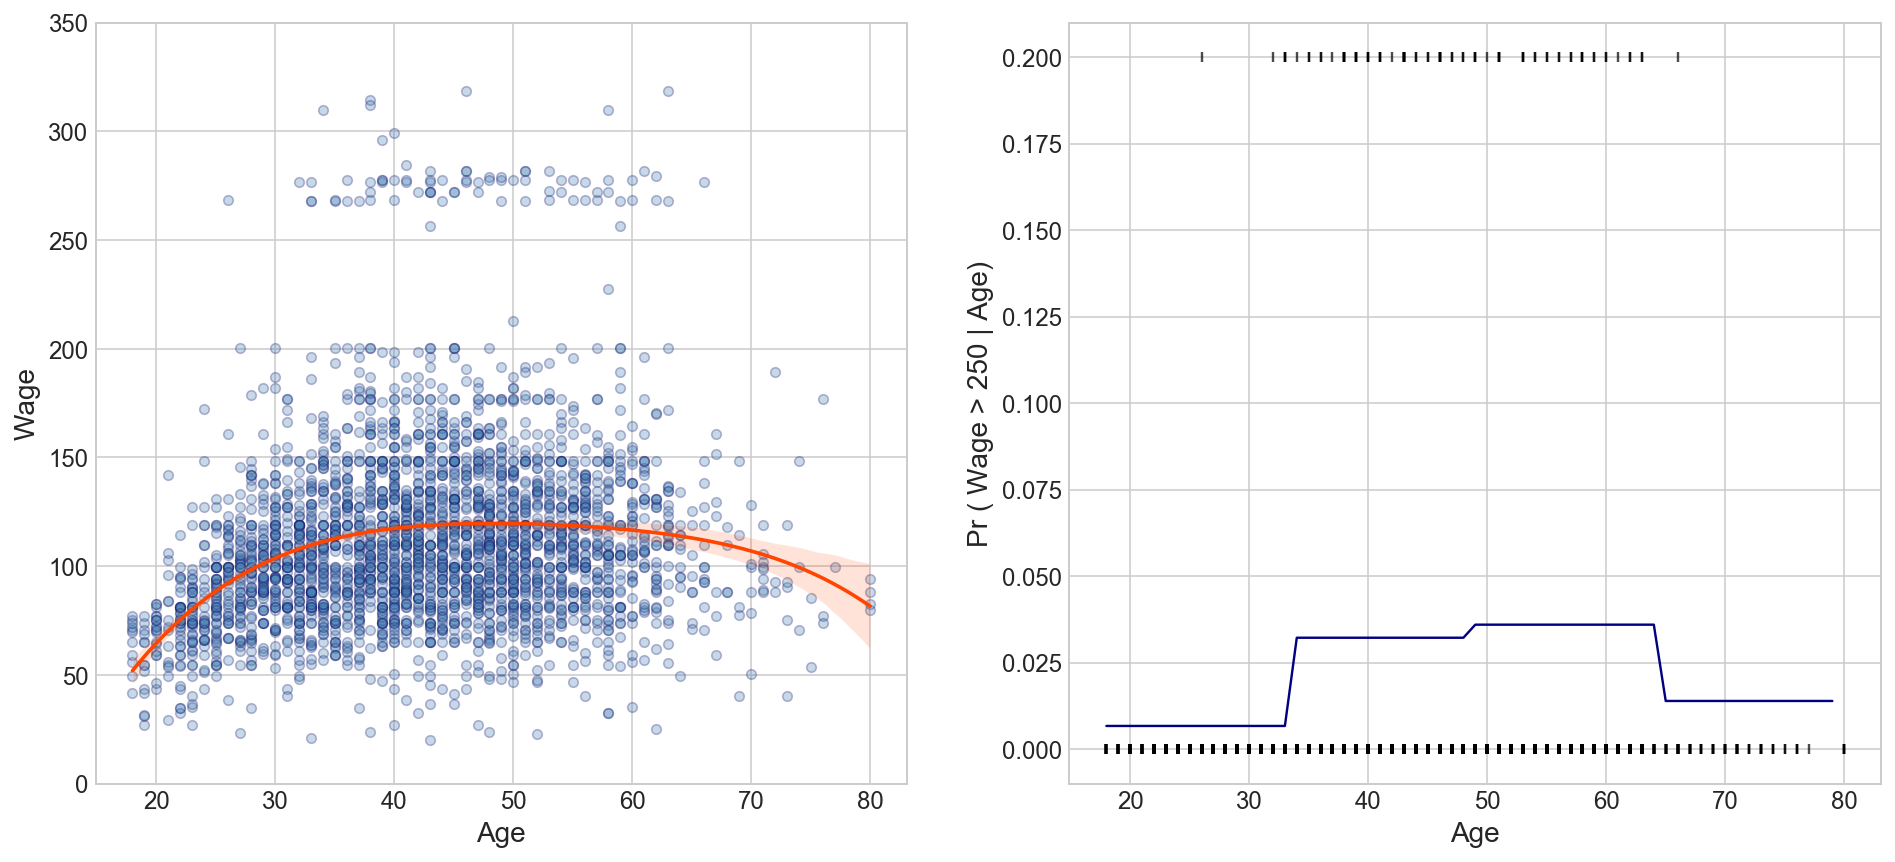

In [11]:
X_test = pd.get_dummies(np.digitize(Age.ravel(), bins))
# adding the constant to the test set
X_test = sm.add_constant(X_test)
Pred = reg.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize=(16,7))

# Left
_ = ax[0].scatter(Wage['Age'], Wage['Wage'], facecolors='SteelBlue', edgecolors='MidnightBlue', alpha=.3)
_ = sns.regplot(Wage['Age'], Wage['Wage'], color='OrangeRed', order = 4, truncate=True, scatter=False, ax=ax[0])
_ = ax[0].set_ylim([0, 350])

# Right
_ = ax[1].plot(Age, Pred, color='Navy')
_ = ax[1].set_xlabel('age')
_ = ax[1].set_ylabel('Pr(wage>250|age)');
_ = ax[1].scatter(Wage['Age'], y/5, s=30, c='Black', marker='|', alpha=0.7)
_ = ax[1].set_ylim([-0.01, 0.21])
_ = ax[1].set_xlabel('Age')
_ = ax[1].set_ylabel('Pr ( Wage > 250 | Age)');

## Basis Functions

The idea is to have at hand a family of functions or transformations that can be applied to a variable X:
$b_1(X)$, $b_2(X)$, $\ldots$ , $b_K(X)$. Instead of fitting a linear model in $X$, we fit the model
$$y_i = \beta_0 + \sum_{j=1}^{K} \beta_jb_j(x_i) + \epsilon_i.$$
where $b_1(·)$, $b_2(·)$, $\ldots$ , $b_K(·)$ are chosen prior to the regression.

Note that polynomial and piecewise-constant regression models are special cases of a **basis function** approach. 

For the next part, we use [**Patsy API**](https://patsy.readthedocs.io/en/latest). First, let's construct design matrix using construct [**dmatrix**](https://patsy.readthedocs.io/en/latest/API-reference.html).

### Cubic Splines

The **bs()** function generates the entire matrix of basis functions for splines with the specified set of knots.

In [12]:
# Specifying 3 knots 25, 40, 60
transformed_x = dmatrix("bs(Wage.Age, knots=(25,40,60), degree=3, include_intercept=False)",
                        {"Wage.Age": Wage.Age}, return_type='dataframe')
reg = sm.GLM(Wage.Wage, transformed_x).fit()

Pred1 = reg.predict(dmatrix("bs(Age, knots=(25,40,60), degree=3, include_intercept=False)",
                          {"Age": Age}, return_type='dataframe'))
pd.DataFrame(reg.params, columns = ['Parameters'])

Parameters
Intercept                                            60.493714
bs(Wage.Age, knots=(25, 40, 60), degree=3, incl...    3.980500
bs(Wage.Age, knots=(25, 40, 60), degree=3, incl...   44.630980
bs(Wage.Age, knots=(25, 40, 60), degree=3, incl...   62.838788
bs(Wage.Age, knots=(25, 40, 60), degree=3, incl...   55.990830
bs(Wage.Age, knots=(25, 40, 60), degree=3, incl...   50.688098
bs(Wage.Age, knots=(25, 40, 60), degree=3, incl...   16.606142

A cubic spline with three knots has seven degrees of freedom; these degrees of freedom are used up by an
intercept, plus six basis functions

### Spline with Knots at Uniform Quantiles

We could also use the **df** option to produce a spline with knots at uniform quantiles of the data.

In [13]:
# Specifying 6 degrees of freedom 
transformed_x = dmatrix("bs(Wage.Age, df=6, degree=3, include_intercept=False)",
                        {"Wage.Age": Wage.Age}, return_type='dataframe')
reg = sm.GLM(Wage.Wage, transformed_x).fit()
Pred2 = reg.predict(dmatrix("bs(Age, df=6, degree=3, include_intercept=False)",
                           {"Age": Age}, return_type='dataframe'))
pd.DataFrame(reg.params, columns = ['Parameters'])

Parameters
Intercept                                            56.313841
bs(Wage.Age, df=6, degree=3, include_intercept=...   27.824002
bs(Wage.Age, df=6, degree=3, include_intercept=...   54.062546
bs(Wage.Age, df=6, degree=3, include_intercept=...   65.828391
bs(Wage.Age, df=6, degree=3, include_intercept=...   55.812734
bs(Wage.Age, df=6, degree=3, include_intercept=...   72.131473
bs(Wage.Age, df=6, degree=3, include_intercept=...   14.750876

### Natural Spline with Four Degrees of Freedom

In [14]:
# Specifying 4 degrees of freedom
transformed_x = dmatrix("cr(Wage.Age, df=4)", {"Wage.Age": Wage.Age}, return_type='dataframe')
reg = sm.GLM(Wage.Wage, transformed_x).fit()
Pred3 = reg.predict(dmatrix("cr(Age, df=4)", {"Age": Age}, return_type='dataframe'))
pd.DataFrame(reg.params, columns = ['Parameters'])

Parameters
Intercept               79.642095
cr(Wage.Age, df=4)[0]  -14.667784
cr(Wage.Age, df=4)[1]   36.811142
cr(Wage.Age, df=4)[2]   35.934874
cr(Wage.Age, df=4)[3]   21.563863

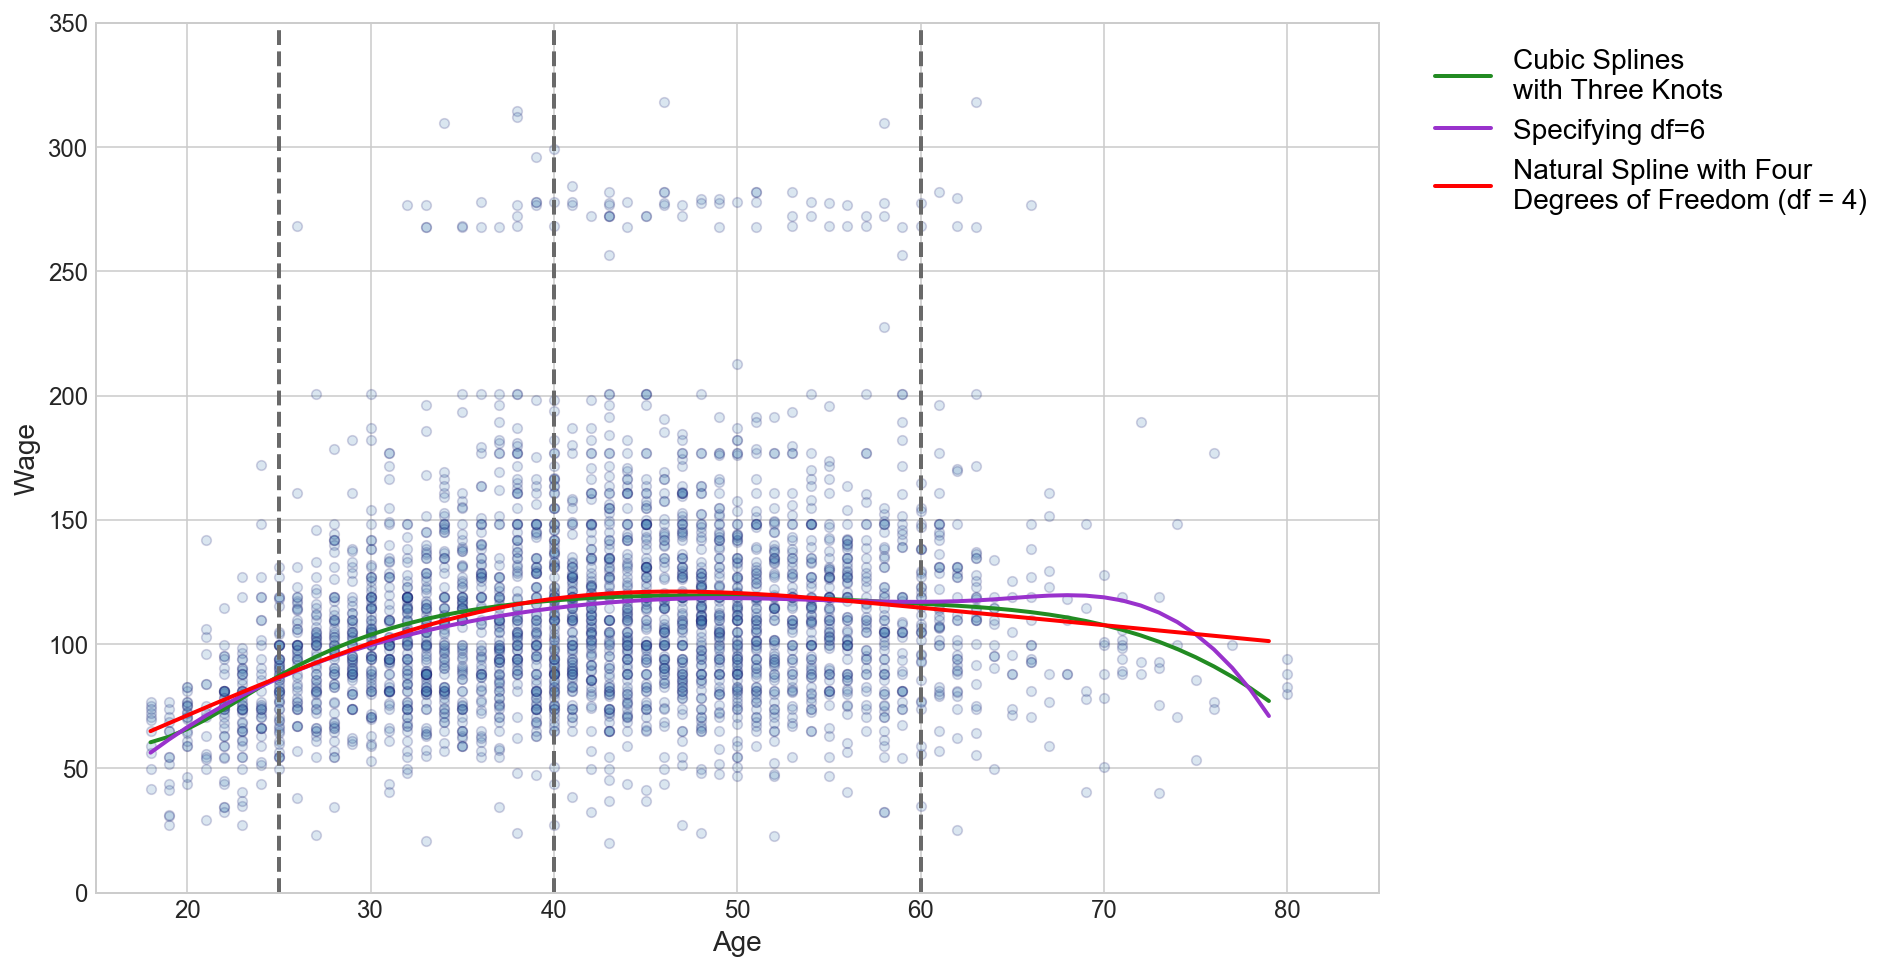

In [15]:
fig, ax = plt.subplots(1,1, figsize=(11.5,8))

_ = ax.scatter(Wage['Age'], Wage['Wage'], facecolors='SteelBlue', edgecolors='MidnightBlue', alpha=.2)
_ = ax.plot(Age, Pred1, lw = 2, color='ForestGreen', label= 'Cubic Splines\nwith Three Knots')
_ = ax.plot(Age, Pred2, lw = 2, color='DarkOrchid', label= 'Specifying df=6')
_ = ax.plot(Age, Pred3, lw = 2, color='Red', label= 'Natural Spline with Four\nDegrees of Freedom (df = 4)')
# vertical lines
for i in [25,40,60]:
    ax.vlines(i , 0, 350, linestyles= 'dashed', lw=2, colors='DimGray')
_ = ax.legend(bbox_to_anchor=(1.4, 1.0), fontsize = 14)
_ = ax.set_xlim(15,85)
_ = ax.set_ylim(0,350)
_ = ax.set_xlabel('Age')
_ = ax.set_ylabel('Wage');

***

## Refrences

* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). [An introduction to statistical learning](https://link.springer.com/book/10.1007/978-1-4614-7138-7) (Vol. 112, pp. 3-7). New York: springer.

* Jordi Warmenhoven, [ISLR-python](https://github.com/JWarmenhoven/ISLR-python)
* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2017). [ISLR: Data for an Introduction to Statistical Learning with Applications in R](https://cran.r-project.org/web/packages/ISLR/index.html)

***